# Machine Learning for Business Analytics tutorial
# Chapter 12: Least squares

### So far we have covered the basic idea in linear algebra including 
### vectors
### matrices
### distances
### clustering
### inverses

### We are now moving to the more interesting topics of statistics and optimization.

###  CH12.1 Least squares problem

$Ax = b$: over-determined, i.e., cannot find a solution to this system.

Instead, we find $x$ to minimize $||Ax  - b||^2$ (minimize the (2-)norm of residual)

In [1]:
# Data
A = [ 2 0 ; -1 1 ; 0 2 ] # tall matrix

3×2 Matrix{Int64}:
  2  0
 -1  1
  0  2

In [2]:
# target variable
b = [ 1, 0, -1 ]

3-element Vector{Int64}:
  1
  0
 -1

In [3]:
# parameter (weight for features)
xhat = [ 1/3, -1/3 ]

2-element Vector{Float64}:
  0.3333333333333333
 -0.3333333333333333

In [4]:
# residuals
rhat = A*xhat - b
using LinearAlgebra
norm(rhat)

0.816496580927726

In [5]:
# another parameter value
x = [ 1/2, -1/2 ]

2-element Vector{Float64}:
  0.5
 -0.5

In [6]:
r = A*x -b
norm(r) # larger and worse than xhat

1.0

So, we aim to find the parameter $x$ that minimize $norm(residual)$

### 12.2 Solution

##### Least squares solution formula

In [7]:
# using formula from partial derivative
inv(A'*A)*A'*b

2-element Vector{Float64}:
  0.33333333333333337
 -0.33333333333333337

In [8]:
# using pseudo-inverse
pinv(A)*b

2-element Vector{Float64}:
  0.3333333333333333
 -0.3333333333333335

In [9]:
(A'*A)*xhat - A'*b  # Check that normal equations hold

2-element Vector{Float64}:
 -2.220446049250313e-16
  2.220446049250313e-16

##### Orthogonality principle 重要 有點問號？？？

For any $n$-vector $z$, we have $Az \perp \hat{r}$

In [10]:
z = [-1.1, 32.3]
println((A*z)'*rhat)
z = [5.3, -1.2]
println((A*z)'*rhat)

3.552713678800501e-15
-6.661338147750939e-16


### 12.3 Solving least squares problems
We will talk about 4 methods here to find $x$ to solve for $||Ax = b||^2$

In [11]:
A = randn(100,20);  b = randn(100);

The backslash operator $A$\ $b$ means $A^\dagger b$

In [12]:
x1 = A\b;  # Least squares using backslash operator

In [13]:
x2 = inv(A'*A)*(A'*b);  # Using formula

In [14]:
x3 = pinv(A)*b;  # Using pseudo-inverse

In [15]:
Q, R = qr(A);

In [16]:
Q = Matrix(Q);

In [17]:
x4 = R\(Q'*b);  # Using QR factorization

In [18]:
norm(x1-x2)

2.528846659381606e-16

In [19]:
norm(x2-x3)

4.415101287194114e-16

In [20]:
norm(x3-x4)

3.941374197003619e-16

##### Complexity

minimization: $2mn^2$ flops

matrix-vector multiplication: $2mn$ flops

total flops $\approx 2mn^2$

The complexity is linear in the row dimension of A and quadratic in the number of variables.

In [23]:
m = 2000; n = 500;
A = randn(m,n); b = randn(m);
@time x1 = A\b;

  0.149084 seconds (3.04 k allocations: 11.969 MiB)


In [24]:
m = 4000; n = 500;
A = randn(m,n); b = randn(m);
@time x1 = A\b; 

  0.305556 seconds (3.04 k allocations: 19.613 MiB)


==> doubling $m$ roughly double the running time

In [25]:
m = 2000; n = 1000;
A = randn(m,n); b = randn(m);
@time x1 = A\b; 

  0.592227 seconds (6.04 k allocations: 31.485 MiB)


==> doubling $n$ roughly increases it $2^2= 4$ times

##### Matrix least squares.                                                  ************Target is a matrix, rather than vector************
Note: the matrix norm here is in terms of the Frobenius norm, which is defined as $||X||_{F}^2 = \sum_{i = 1}^N \sum_{j = 1}^M x_{ij}^2$.

minimize$_X$ $||AX  - B||^2$

Therefore, we have that $||AX  - B||^2 = ||Ax_{1}  - b_1||^2 + \dots + ||Ax_{k}  - b_{k}||^2$

==> The same as finding the minimization problem for multiple times (over the columns of $X$ and columns of $b$)

Choose the $n  \times k$  matrix $X$ to minimize $||AX  - B||^2$ with $A$ being $m \times n$ matrix and $B$ being $m \times k$ matrix

In [26]:
A = randn(1000,100); 
B = randn(1000,10); # was a vector then, but now a matrix
X = A\B;
# Check that third column of X is least squares solution
# with third column of B
x3 = A\B[:,3];
norm(X[:,3]-x3) 

1.4888497185781228e-16

X[:,3]: calculate them together using matrix least square 

vs. x3: the normal vector form least square

### 12.4 Examples

$m$ demographic groups

$n$ different channels (say, different web publishers, radio, print, . . . )

$R_{ij}$ means the money group $i$ spent on marketing channel $j$

In [27]:
R = [ 0.97  1.86  0.41;
             1.23  2.18  0.53;
             0.80  1.24  0.62;
             1.29  0.98  0.51;
             1.10  1.23  0.69;
             0.67  0.34  0.54;
             0.87  0.26  0.62;
             1.10  0.16  0.48;
             1.92  0.22  0.71;
             1.29  0.12  0.62];

In [28]:
m, n = size(R);

In [33]:
println(m)
println(n)

10
3


In [34]:
vdes = 1e3 * ones(m); # the goal for each group is 1000

want find $s$ to minimize $||Rs - v^{des}||^2$

In [43]:
s = R \ vdes

3-element Vector{Float64}:
   62.07662454385101
   99.98500402826197
 1442.8374625412223

In [36]:
R * s

10-element Vector{Float64}:
  837.7497929420039
 1059.0254121173957
 1068.2019314056834
  913.911255505288
 1186.8236911064416
  854.7184695862493
  974.5619911760563
  776.8438696625446
 1165.5984184146794
  986.6362729205171

In [37]:
using VMLS
rms(R*s - vdes)

132.63819026326527

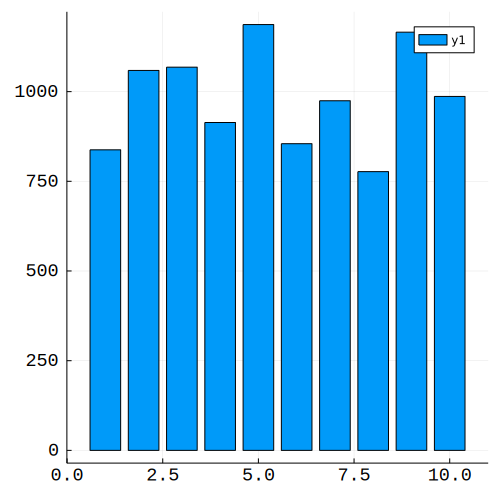

In [42]:
using Plots
bar(R*s, size = (500, 500), xtickfont = font(10, "Courier"),ytickfont = font(10, "Courier"))

# Chapter 13 Least squares data fitting

##### 13.1 Least squares data fitting

#### We will be talking about the different model fits
#### 1. Straight-line fit
#### 2. Seasonal-component fit
#### 3. Polynomial fit.
#### 4. Piecewise-linear fit.
#### 5. Autoregressive model fit.



##### 1. Straight-line fit
$\hat{f}(x) = a + b x$, a: intercept, b: slpoe

$consumption = a + b \times year$

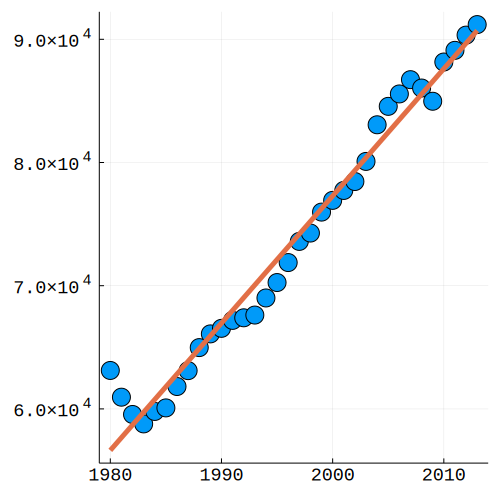

In [19]:
# Petroleum consumption in thousand barrels/day
using VMLS
consumption = petroleum_consumption_data()
n = length(consumption);

A = [ ones(n) 1:n]; # intercept and year (the same as simply using sequence)
x = A \ consumption;
using Plots
scatter(1980:2013, consumption, legend=false, markersize = 10)
plot!(1980:2013, A*x, linewidth = 5,  size = (500, 500), xtickfont = font(10, "Courier"),ytickfont = font(10, "Courier"))


In [20]:
println(consumption)
println(n)
println(A)

[63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 64978, 66090, 66541, 67186, 67396, 67619, 69006, 70258, 71880, 73597, 74274, 75975, 76928, 77732, 78457, 80089, 83063, 84558, 85566, 86724, 86046, 84972, 88157, 89105, 90340, 91195]
34
[1.0 1.0; 1.0 2.0; 1.0 3.0; 1.0 4.0; 1.0 5.0; 1.0 6.0; 1.0 7.0; 1.0 8.0; 1.0 9.0; 1.0 10.0; 1.0 11.0; 1.0 12.0; 1.0 13.0; 1.0 14.0; 1.0 15.0; 1.0 16.0; 1.0 17.0; 1.0 18.0; 1.0 19.0; 1.0 20.0; 1.0 21.0; 1.0 22.0; 1.0 23.0; 1.0 24.0; 1.0 25.0; 1.0 26.0; 1.0 27.0; 1.0 28.0; 1.0 29.0; 1.0 30.0; 1.0 31.0; 1.0 32.0; 1.0 33.0; 1.0 34.0]


In [21]:
x # from 1:n

2-element Vector{Float64}:
 55604.93048128342
  1032.5703590527119

In [22]:
x # from 1980:1980 + n

2-element Vector{Float64}:
 55604.93048128342
  1032.5703590527119

##### 2. Estimation of trend and seasonal component.

In [23]:
vmt = vehicle_miles_data();  # creates 15x12 matrix vmt
m = 15 * 12;

A = [ 0:(m-1)  vcat([eye(12) for i=1:15]...) ]; # time trend + sesonal effect
b = reshape(vmt', m, 1);
x = A \ b;

In [24]:
# reshape(vehicle_miles_data()', m, 1)
# reshape(vehicle_miles_data(), m, 1)

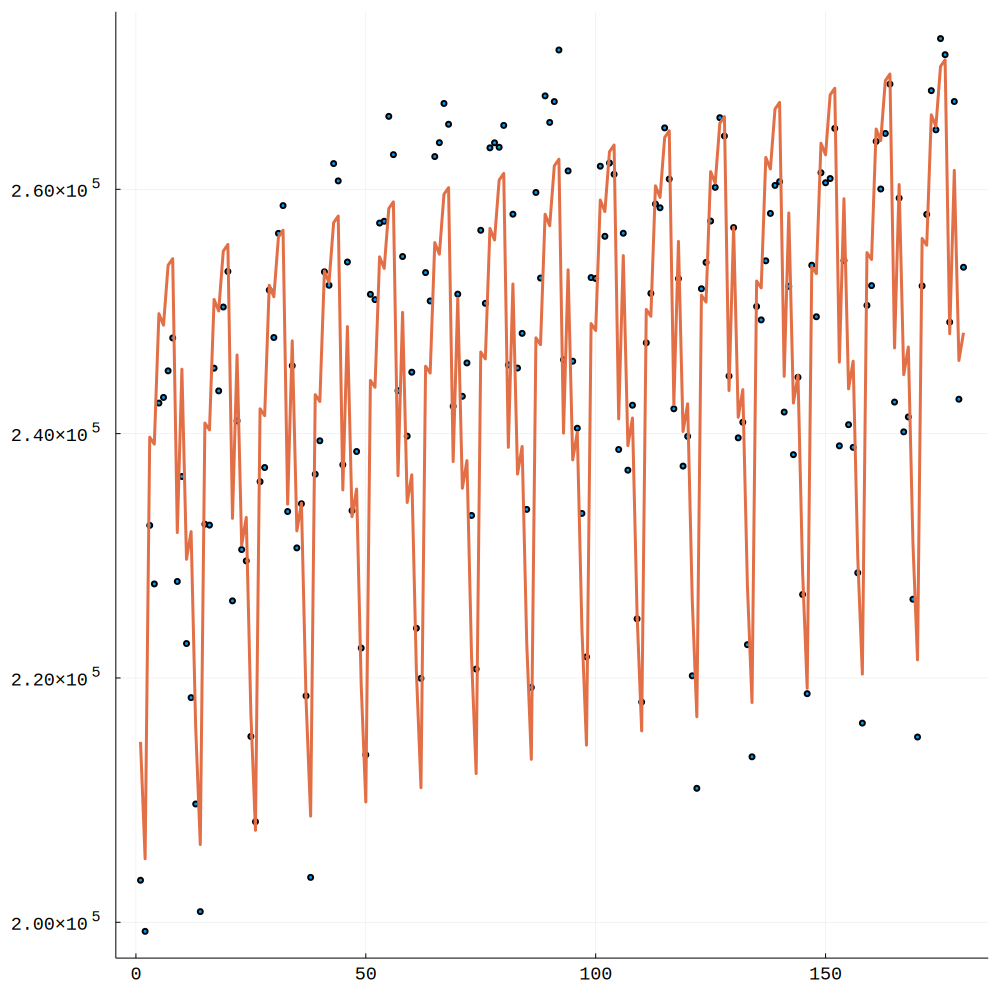

In [25]:
using Plots
scatter(1:m, b, markersize = 3, legend =false);
plot!(1:m, A*x,linewidth = 3, size = (1000, 1000), xtickfont = font(10, "Courier"),ytickfont = font(10, "Courier"))

In [317]:
vcat([eye(12) for i=1:15]...)

180×12 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                        ⋮    
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0

##### 3. Polynomial fit.
$\hat{f}(x) = \theta_1 + \theta_2x + \theta_3x^2 + \dots + \theta_px^{p-1}$

So we will naturally use the vandermonde matrix

For example, the vandermonde matrix for $x_0 = [1,2, 3]$ is:

In [4]:
x0 = [1, 2, 3]
vandermonde(x0, 4)

3×4 Matrix{Int64}:
 1  1  1   1
 1  2  4   8
 1  3  9  27

We will use the Vandermonde matrix to create the matrix $A$

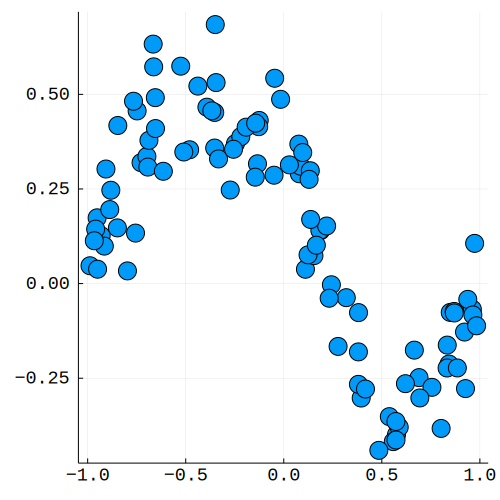

In [5]:
# Generate training data in the interval [-1, 1].
m = 100;
t = -1 .+ 2*rand(m,1);
y = t.^3 - t + 0.4 ./ (1 .+ 25*t.^2) + 0.10*randn(m,1);
using Plots
scatter(t,y,legend=false, size = (500, 500), markersize = 10, xtickfont = font(10, "Courier"),ytickfont = font(10, "Courier"))

Use the vandermonde matrix 

In [6]:
polyfit(t, y, p) = vandermonde(t, p) \ y
theta2 = polyfit(t,y, 3)   # to the power of 2
theta6 = polyfit(t,y, 7)
theta10 = polyfit(t,y, 11)
theta15 = polyfit(t,y, 16)

16×1 Matrix{Float64}:
    0.36211234385920554
   -0.6420924910207672
   -3.966209492188407
   -3.5751266556607395
   24.834453838107578
   18.58583545746404
  -93.08877982174447
  -52.05858824954776
  213.7207515769542
  135.00265683787202
 -288.7161502002251
 -228.09213734023643
  207.4175298128946
  192.41476883047304
  -60.60082023240383
  -61.67995906062434

In [7]:
vandermonde(t, 3)

100×3 Matrix{Float64}:
 1.0  -0.349351   0.122046
 1.0  -0.352309   0.124122
 1.0  -0.525384   0.276029
 1.0   0.394877   0.155928
 1.0  -0.727715   0.529569
 1.0   0.574794   0.330389
 1.0   0.0796402  0.00634257
 1.0  -0.755953   0.571465
 1.0  -0.0462494  0.002139
 1.0  -0.345124   0.119111
 1.0  -0.697897   0.48706
 1.0  -0.391977   0.153646
 1.0   0.277019   0.0767397
 ⋮                
 1.0   0.231504   0.0535939
 1.0  -0.906691   0.822089
 1.0   0.0768494  0.00590584
 1.0   0.123741   0.0153119
 1.0   0.0967453  0.00935966
 1.0   0.218638   0.0478027
 1.0   0.802388   0.643826
 1.0   0.166164   0.0276105
 1.0  -0.143236   0.0205165
 1.0   0.885147   0.783485
 1.0   0.572329   0.327561
 1.0   0.137152   0.0188106

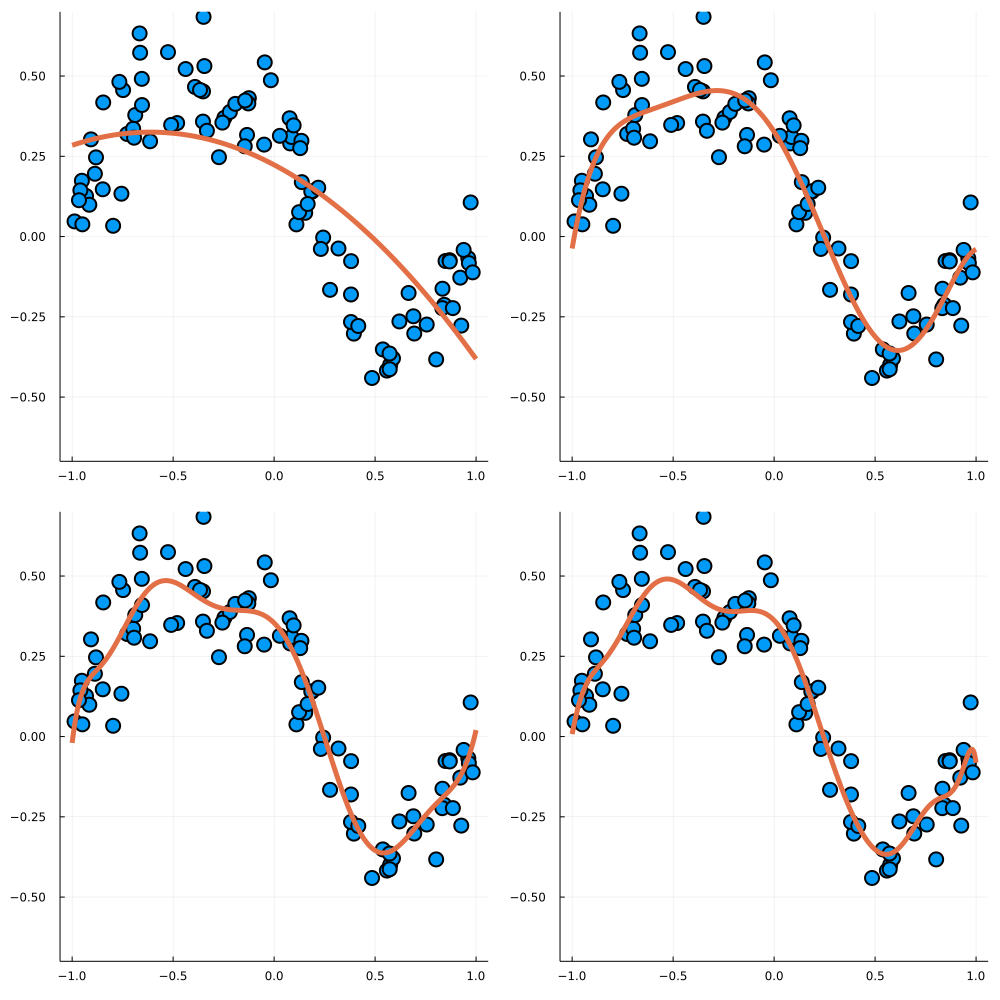

In [10]:
polyeval(theta, x) = vandermonde(x,length(theta))*theta;
t_plot = linspace(-1,1,1000);
using Plots
p = plot(layout=4, legend=false, ylim=(-0.7, 0.7))
scatter!(t, y, subplot=1, markersize = 8, size = (1000, 1000))
plot!(t_plot, linewidth = 5, polyeval(theta2,t_plot), subplot=1)
scatter!(t, y, subplot=2, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta6,t_plot), subplot=2)
scatter!(t, y, subplot=3, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta10,t_plot), subplot=3)
scatter!(t, y, subplot=4, markersize = 8)
plot!(t_plot, linewidth = 5, polyeval(theta15,t_plot), subplot=4)

##### 4. Piecewise-linear fit.

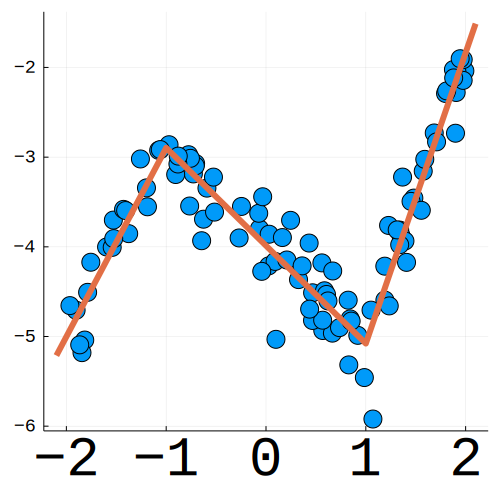

In [12]:
# generate random data
m = 100;
x = -2 .+ 4*rand(m,1);
y = 1 .+ 2*(x.-1) - 3*max.(x.+1,0) + 4*max.(x.-1,0) + 0.3*randn(m,1);
# least squares fitting
theta = [ ones(m)  x   max.(x.+1,0)  max.(x.-1,0) ] \ y;
# plot result
using Plots

t = [-2.1, -1, 1, 2.1]; # cut points (select them explicitly)
yhat = theta[1] .+ theta[2]*t + theta[3]*max.(t.+1,0) + theta[4]*max.(t.-1,0);
scatter(x, y, legend=false, markersize = 10)
plot!(t, yhat, linewidth = 6, size = (500, 500),xtickfont = font(30, "Courier"),ytickfont = font(10, "Courier"))

##### House price regression.

In [16]:
D = house_sales_data();  # creates 3 vectors: area, beds, price
area = D["area"];
beds = D["beds"];
price = D["price"];
m = length(price);
A = [ones(m) area beds ];  # intercept, area, beds
x = A \ price              # data \ target variable
rms_error = rms(price - A*x)
std_prices = stdev(price)

112.78216159756506

In [17]:
A

774×3 Matrix{Float64}:
 1.0  0.941  2.0
 1.0  1.146  3.0
 1.0  0.909  3.0
 1.0  1.289  3.0
 1.0  1.02   3.0
 1.0  1.022  2.0
 1.0  1.134  2.0
 1.0  0.844  2.0
 1.0  0.795  2.0
 1.0  0.588  2.0
 1.0  1.356  3.0
 1.0  1.118  3.0
 1.0  1.329  4.0
 ⋮           
 1.0  0.96   3.0
 1.0  1.456  3.0
 1.0  1.45   3.0
 1.0  1.358  3.0
 1.0  1.329  4.0
 1.0  1.715  4.0
 1.0  1.262  3.0
 1.0  2.28   4.0
 1.0  1.477  3.0
 1.0  1.216  3.0
 1.0  1.685  4.0
 1.0  1.362  3.0

##### 5. Auto-regressive time series model.
$\hat{z}_{t+1} = \theta_1 z_t + \theta_2 z_{t-1} + \dots  + \theta_{M}z_{t-M + 1}$

In [15]:
# import time series of temperatures t
t = temperature_data();
N = length(t)

744

In [368]:
stdev(t) # Standard deviation 

3.05055928562933

In [77]:
# RMS error for simple predictor zhat_{t+1} = z_t
rms(t[2:end] - t[1:end-1])

1.1602431638206119

In [78]:
# RMS error for simple predictor zhat_{t+1} = z_{t-23}
rms(t[25:end] - t[1:end-24])

1.7338941400468744

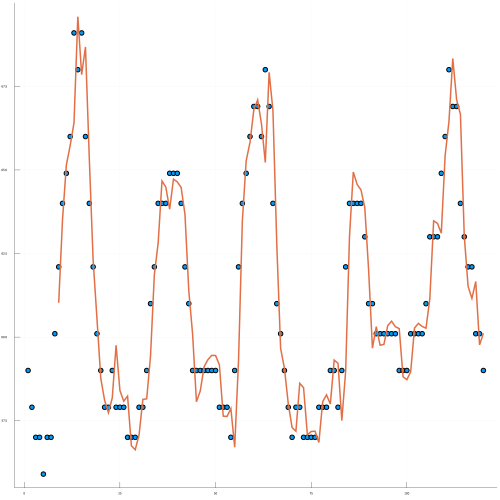

In [373]:
# Least squares fit of AR predictor with memory 8
M = 8
y = t[M+1:end];
A = hcat( [ t[i:i+N-M-1] for i = M:-1:1]...);
theta = A \ y;
ypred = A * theta;
 # RMS error of LS AR fit
rms(ypred - y)
# Plot first five days
Nplot = 24*5
scatter(1:Nplot, t[1:Nplot], legend =false, markersize = 10)
plot!(M+1:Nplot, ypred[1:Nplot-M], size = (2000, 2000), linewidth = 6)

### 13.2 Validation
### Different polynomial degree

In [414]:
# Generate the test set.
m = 100;
t = -1 .+ 2*rand(m,1);
t_test = -1 .+ 2*rand(m,1);
y = t.^3 - t + 0.4 ./ (1 .+ 25*t.^2) + 0.10*randn(m,1);
y_test = t_test.^3 - t_test + 0.4 ./ (1 .+ 25*t_test.^2) + 0.10*randn(m,1);

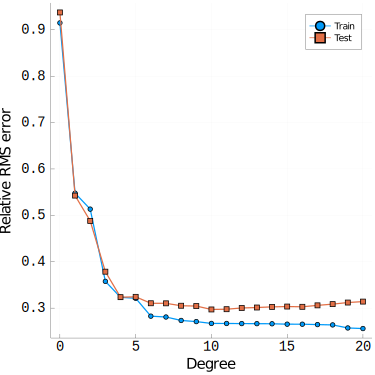

In [415]:
error_train = zeros(21);
error_test = zeros(21);
for p = 1:21  # cganging different degree! on testing and training data
    A = vandermonde(t,p)
    theta = A \ y
    error_train[p] = norm(A*theta - y) / norm(y)
    error_test[p] = norm( vandermonde(t_test, p) * theta - y_test) / norm(y_test);
end
plot(0:20, error_train, label = "Train", marker = :circle, size = (1500, 1500), markersize = 10, linewidth = 5)
plot!(0:20, error_test, label = "Test", marker = :square,markersize = 10, linewidth = 5)
plot!(xlabel="Degree", ylabel = "Relative RMS error", xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

### cross-validation

In [4]:
using LinearAlgebra
using VMLS
using Plots

D = house_sales_data();
price = D["price"];
area = D["area"];
beds = D["beds"];
condo = D["condo"];
location = D["location"];
N = length(price);
X = hcat(ones(N), area, max.(area.-1.5, 0), beds, condo, location .== 2, location .== 3,  location .== 4 );
theta = X \ price


(process:18996): GLib-GIO-WARNING **: 19:54:03.042: Unexpectedly, UWP app `Evernote.Evernote_10.27.5.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


8-element Vector{Float64}:
  115.61682367025578
  175.4131406399583
  -42.747767967825816
  -17.878355235243372
  -19.044725650546585
 -100.91050308608217
 -108.79112222093231
  -24.765247347062374

In [5]:
rms(X*theta - price)  # RMS prediction error

68.34428699036884

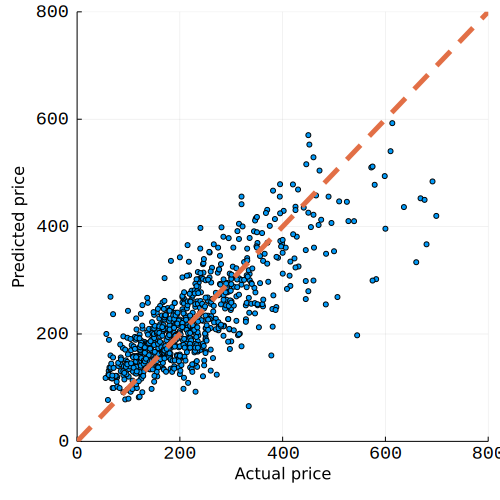

In [6]:
scatter(price, X*theta, lims = (0,800), markersize = 3)
plot!([0, 800], [0, 800], linestyle = :dash, legend = false, linewidth = 5)
plot!(xlims = (0,800), ylims = (0,800), size = (500,500))
plot!(xlabel = "Actual price", ylabel = "Predicted price", xtickfont = font(10, "Courier"),ytickfont = font(10, "Courier"), legendfont=font(25))

In [7]:
nfold = div(N,5) # 5 randomly chosen folds

154

In [8]:
import Random;

In [9]:
I = Random.randperm(N);

In [10]:
models = zeros(8,5);  # store 8 coefficients for the 5 models

In [11]:
errors = zeros(2,5);  # prediction errors

In [12]:
for k = 1:5
    if k == 1
        Itrain = I[nfold+1:end]; # seperate the training set and 
        Itest = I[1:nfold];
    elseif k == 5
        Itrain = I[1:4*nfold];
        Itest = I[4*nfold+1:end];
    else
        Itrain = I[ [1:(k-1)*nfold ; k*nfold+1 : N]]
        Itest = I[ [(k-1)*nfold+1 ; k*nfold ]];
    end;
    Ntrain = length(Itrain)
    Ntest = length(Itest)
    theta = X[Itrain,:] \ price[Itrain];
    errors[1,k] = rms(X[Itrain,:] * theta - price[Itrain]);  # training set
    errors[2,k] = rms(X[Itest,:] * theta - price[Itest]);    # testing set
    models[:,k] = theta;
end;

In [13]:
# display the eigth coefficients for each of the 5 folds

In [14]:
# import Pkg; Pkg.add("DataFrames")
using DataFrames
df = DataFrame(fold1 = models[:,1], fold2 = models[:,2], fold3 = models[:,3], fold4 = models[:,4], fold5 = models[:,5])

,fold1,fold2,fold3,fold4,fold5
,Float64,Float64,Float64,Float64,Float64
1,121.804,116.982,90.3341,134.415,118.523
2,174.332,171.243,177.071,176.991,176.145
3,-42.0652,-40.0651,-47.4409,-42.3795,-40.2284
4,-18.4757,-14.3293,-17.0136,-18.8555,-20.7751
5,-24.3369,-14.2518,-19.917,-17.3091,-18.8898
6,-102.426,-109.873,-80.6933,-119.212,-94.6595
7,-110.576,-115.655,-91.1658,-124.311,-104.587
8,-26.2374,-33.3062,-8.08509,-41.0199,-16.944


In [15]:
# display training errors (1st row) and test errors (2nd row)

In [16]:
errors # for training and testing for all the 5 model folds

2×5 Matrix{Float64}:
 69.6031  68.3051  65.322   68.0626  69.9431
 63.1128  54.0027  79.1387  35.3764  61.9637

# Chapter 14 Least squares classification

What does classification mean here? 

e.g., TRUE/ FALSE responses; other labels

##### 14.1 Classification

In [121]:
tf2pm1(b) = 2*b-1

tf2pm1 (generic function with 1 method)

In [122]:
b = true

true

In [123]:
tf2pm1(b)

1

In [124]:
b = false

false

In [125]:
tf2pm1(b)

-1

In [126]:
b = [ true, false, true ]

3-element Vector{Bool}:
 1
 0
 1

In [127]:
tf2pm1.(b)

3-element Vector{Int64}:
  1
 -1
  1

##### Confusion matrix.

$\quad \quad \quad \quad \quad $ prediction


$\quad \quad \quad \quad$ y_hat = 1 y_hat =0

outcome

y = 1 $\quad \quad \quad $  tp $\quad \quad \quad $ nf

y = 0    $\quad \quad \quad $     np  $\quad \quad \quad $      tn

In [2]:
# Count errors and correct predictions
Ntp(y,yhat) = sum( (y .== true) .& (yhat .== true) );
Nfn(y,yhat) = sum( (y .== true) .& (yhat .== false) );
Nfp(y,yhat) = sum( (y .== false) .& (yhat .== true) );
Ntn(y,yhat) = sum( (y .== false) .& (yhat .== false) );
error_rate(y,yhat) = (Nfn(y,yhat) + Nfp(y,yhat)) / length(y);
confusion_matrix(y,yhat) = [ Ntp(y,yhat) Nfn(y,yhat); Nfp(y,yhat) Ntn(y,yhat) ];

In [6]:
y = rand(Bool,100);     # actual group
yhat = rand(Bool,100);  # predicted group

In [7]:
confusion_matrix(y,yhat)
# tp fn
# fp tn

2×2 Matrix{Int64}:
 19  26
 29  26

In [8]:
error_rate(y,yhat) # fp + fn / total

0.55

##### 14.2 Least squares classifier

In [138]:
ftilde(x) = x'*beta .+ v  # Regression model

ftilde (generic function with 1 method)

In [139]:
fhat(x) = ftilde(x) > 0   # Regression classifier

fhat (generic function with 1 method)

##### Iris flower classification.
There are four variables for each flower

x1 is the sepal length in cm

x2 is the sepal width in cm

x3 is the petal length in cm

x4 is the petal width in cm

In [22]:
using VMLS
D = iris_data();

# Create 150x4 data matrix
iris = vcat(D["setosa"], D["versicolor"], D["virginica"])

# y[k] is true (1) if virginica, false (0) otherwise
y = [ zeros(Bool, 50); zeros(Bool, 50); ones(Bool, 50) ];
A = [ ones(150) iris ]
theta = A \ (2*y .- 1)   # to 1 and -1

5-element Vector{Float64}:
 -2.3905637266512043
 -0.09175216910134579
  0.4055367711191057
  0.007975822012793829
  1.1035586498675736

In [23]:
print(y)

Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [24]:
yhat = A*theta .> 0;

In [25]:
println(y)
println(yhat)

Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [26]:
C = confusion_matrix(y, yhat)

2×2 Matrix{Int64}:
 46   4
  7  93

In [24]:
err_rate = (C[1,2] + C[2,1]) / length(y)

0.07333333333333333

In [25]:
avg(y .!= yhat)

0.07333333333333333

### 14.3 Multi-class classifiers

can also construct a confuison matrix with multiple classifiers

In [16]:
error_rate(y, yhat) = avg(y .!= yhat);

In [27]:
function confusion_matrix(y, yhat, K)
C = zeros(K,K)
for i in 1:K 
    for j in 1:K
        C[i,j] = sum((y .== i) .& (yhat .== j))
    end 
end
return C
end;

In [28]:
 # test for K=4 on random vectors of length 100

In [29]:
K = 4

4

In [30]:
y = rand(1:K, 100);  yhat = rand(1:K, 100);  # actual and predict

In [31]:
C = confusion_matrix(y, yhat, K)

4×4 Matrix{Float64}:
 5.0  10.0  9.0  8.0
 5.0   7.0  3.0  3.0
 8.0   9.0  6.0  1.0
 8.0   5.0  5.0  8.0

In [32]:
using LinearAlgebra
error_rate(y, yhat),  1-sum(diag(C))/sum(C)

(0.74, 0.74)

##### Least squares multi-class classifier.

In [44]:
row_argmax(u) = [ argmax(u[i,:]) for i = 1:size(u,1) ]

row_argmax1 (generic function with 1 method)

In [34]:
A = randn(4,5)

4×5 Matrix{Float64}:
  0.0627167   1.17727   -0.257532  1.67187    0.988601
  0.506322    0.881164   0.389101  0.88114    1.08561
 -0.795975    0.87191   -0.553882  0.987256   0.340643
 -1.16137    -0.314038   0.382329  0.726526  -0.141164

In [35]:
 row_argmax(A)

4-element Vector{Int64}:
 4
 5
 4
 4

In [36]:
fhat(X,Theta) = row_argmax(X'*Theta)

fhat (generic function with 1 method)

##### Matrix least squares.

In [39]:
function one_hot(ycl,K)
    N = length(ycl)
    Y = zeros(N,K)
    for j in 1:K
        Y[findall(ycl .== j), j] .= 1
    end
    return Y
end;

In [40]:
K = 4;
ycl = rand(1:K,6)

6-element Vector{Int64}:
 2
 1
 1
 2
 4
 2

In [43]:
Y = one_hot(ycl, K)

6×4 Matrix{Float64}:
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0

In [44]:
 2*Y .- 1

6×4 Matrix{Float64}:
 -1.0   1.0  -1.0  -1.0
  1.0  -1.0  -1.0  -1.0
  1.0  -1.0  -1.0  -1.0
 -1.0   1.0  -1.0  -1.0
 -1.0  -1.0  -1.0   1.0
 -1.0   1.0  -1.0  -1.0

In [45]:
function ls_multiclass(X,ycl,K)
n, N = size(X)
Theta = X' \ (2*one_hot(ycl,K) .- 1)
yhat = row_argmax(X'*theta)
return Theta, yhat
end

ls_multiclass (generic function with 1 method)

##### Iris flower classification.

In [1]:
using VMLS
D = iris_data();
setosa = D["setosa"];
versicolor = D["versicolor"];
virginica = D["virginica"];

In [2]:
# pick three random permutations of 1,..., 50
using Random
I1 = Random.randperm(50);
I2 = Random.randperm(50);
I3 = Random.randperm(50);

In [3]:
# training set is 40 randomly picked examples per class

In [4]:
Xtrain = [ setosa[I1[1:40],:];
    versicolor[I2[1:40],:];
    virginica[I3[1:40],:] ]';  # 4x120 data matrix

In [5]:
# add constant feature one

In [6]:
Xtrain = [ ones(1,120); Xtrain ];  # 5x120 data matrix ones + 4 variables

In [7]:
ytrain = [ ones(40); 2*ones(40); 3*ones(40) ];

In [8]:
# test set is remaining 10 examples for each class

In [9]:
Xtest = [setosa[I1[41:end], :];
    versicolor[I2[41:end],:];
    virginica[I3[41:end],:] ]';
Xtest = [ ones(1,30); Xtest ]
ytest = [ones(10); 2*ones(10); 3*ones(10)];

In [12]:
function ls_multiclass(X,ycl,K)
       n, N = size(X)
       Theta = X' \ (2*one_hot(ycl,K) .- 1) # to 1 and -1
       yhat = row_argmax(X'*Theta)          # the one that fits the most (1)
return Theta, yhat
end

ls_multiclass (generic function with 1 method)

In [13]:
Theta, yhat = ls_multiclass(Xtrain, ytrain, 3);

In [14]:
Ctrain = confusion_matrix(ytrain, yhat, 3)

3×3 Matrix{Float64}:
 40.0   0.0   0.0
  0.0  29.0  11.0
  0.0   7.0  33.0

In [17]:
error_train =  error_rate(ytrain, yhat)

0.15

In [19]:
yhat = row_argmax(Xtest'*Theta);

In [20]:
Ctest = confusion_matrix(ytest, yhat, 3)

3×3 Matrix{Float64}:
 10.0  0.0  0.0
  0.0  8.0  2.0
  0.0  2.0  8.0

In [21]:
error_test =  error_rate(ytest, yhat)

0.13333333333333333

# Chapter 15 Multi-objective least squares


##### 15.1 Multi-objective least squares
$J = \lambda_1 J_1 +  \dots + \lambda_k J_k
 = \lambda_1 ||A_1x_1 - b_1||^2 + \dots + \lambda_k ||A_kx_k - b_k||^2 = ||\tilde{A}x - \tilde{b}||^2$
 
 $\tilde{A} = [\sqrt{\lambda_1}A_1 \dots \sqrt{\lambda_k}A_k]^\top$
 
 $\tilde{b} = [\sqrt{\lambda_1}b_1 \dots \sqrt{\lambda_k}b_k]^\top$

In [123]:
# Help you to solve 
function mols_solve(As,bs,lambdas)
       k = length(lambdas);
       Atil = vcat([sqrt(lambdas[i])*As[i] for i=1:k]...)
       btil = vcat([sqrt(lambdas[i])*bs[i] for i=1:k]...)
       return Atil \ btil
end

mols_solve (generic function with 1 method)

#####  Simple example.

This example is with only two objectives. So, only need one lambda!

In [125]:
As = [randn(10,5), randn(10,5)];
bs = [randn(10), randn(10)];
N = 200;
lambdas = 10 .^ linspace(-4,4,200);
x = zeros(5,N); # 5 variables
J1 = zeros(N); 
J2 = zeros(N); 

In [126]:
for k = 1:N
    x[:,k] = mols_solve(As, bs, [1, lambdas[k]])
    J1[k] = norm(As[1]*x[:,k] - bs[1])^2
    J2[k] = norm(As[2]*x[:,k] - bs[2])^2
end;

In [95]:
 # plot solution versus lambda

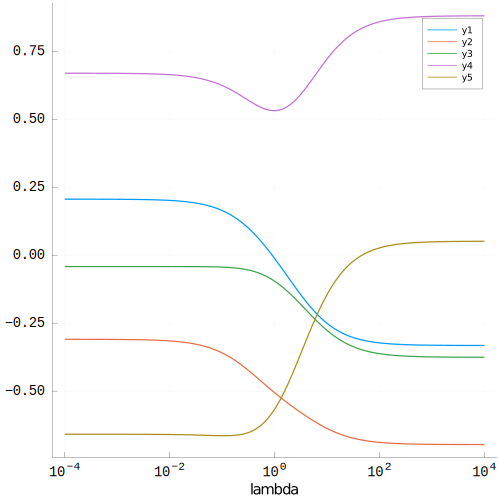

In [105]:
using Plots
plot(lambdas, x', xscale = :log10, xlabel = "lambda", size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

# The different parameter values found using different lambda

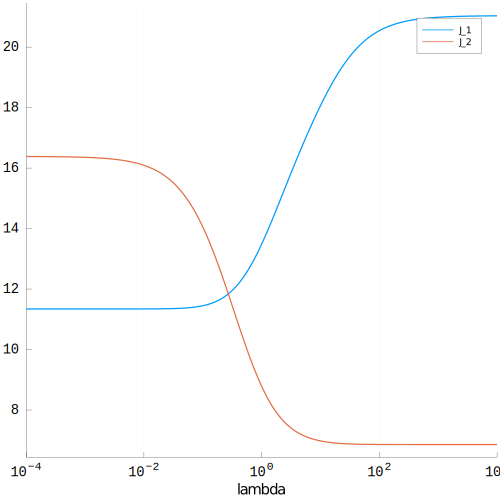

In [114]:
# plot two objectives versus lambda
plot(lambdas, J1, xscale = :log10, label = "J_1", linewidth = 5);
plot!(lambdas, J2, label = "J_2", xlabel = "lambda", xlims = (1e-4,1e4), size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

# The two objective values

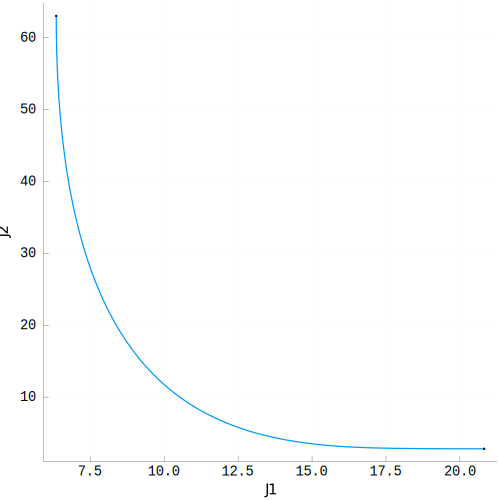

In [127]:
# plot trade-off curve
plot(J1, J2, xlabel="J1", ylabel = "J2", legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
# add (single-objective) end points to trade-off curve
x1 = As[1] \ bs[1];
x2 = As[2] \ bs[2];
J1 = [norm(As[1]*x1-bs[1])^2, norm(As[1]*x2-bs[1])^2];
J2 = [norm(As[2]*x1-bs[2])^2, norm(As[2]*x2-bs[2])^2];
scatter!(J1,J2)

### 15.3 Estimation and inversion
### Estimating a periodic time series

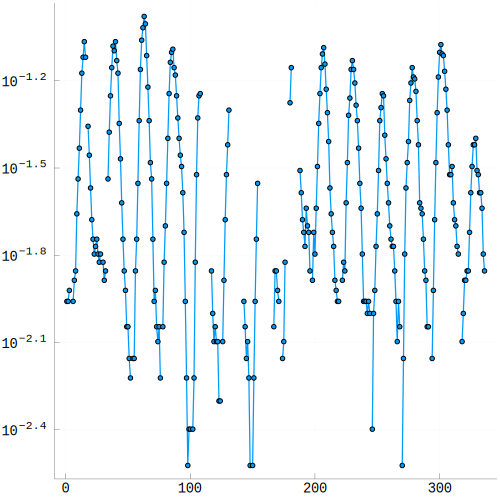

In [27]:
using Plots
ozone = ozone_data();  # a vector of length 14*24 = 336
k = 14;  N = k*24;
plot(1:N, ozone, yscale = :log10, marker = :circle, markersize = 10, legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))


##### Smoothing

What does smooth mean?

We do this by minimizing $||Ax - y||^2 + \lambda ||D^{circ} x ||^2,$

where $D^{circ} = [-1, 1, 0 ...; 0, -1, 1, 0, ...]$

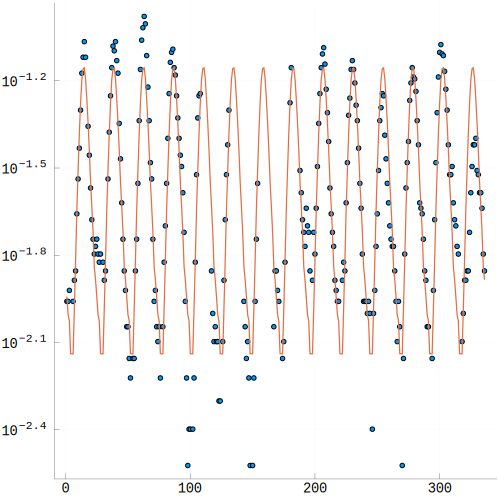

In [32]:
A = vcat( [eye(24) for i = 1:k]...)
# periodic difference matrix
D = -eye(24) + [zeros(23,1) eye(23); 1  zeros(1,23)];
ind = [k for k in 1:length(ozone) if !isnan(ozone[k])];

As = [A[ind,:], D]
bs = [log.(ozone[ind]), zeros(24)]

# solution for lambda = 1
x = mols_solve( As, bs, [1, 1])
scatter(1:N, ozone, yscale = :log10,markersize = 10, legend=false,  size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
plot!(1:N, vcat([exp.(x) for i = 1:k]...), linewidth = 5)


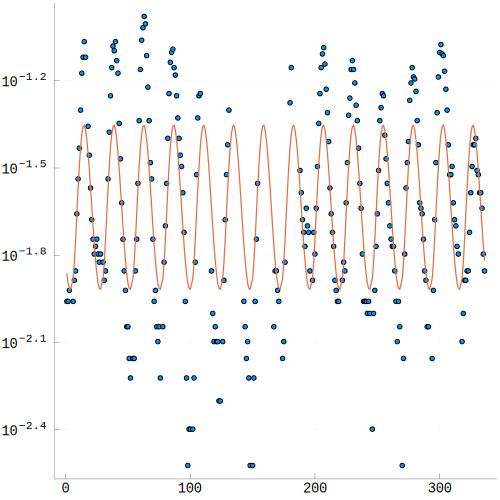

In [33]:
# solution for lambda = 100
x = mols_solve( As, bs, [1, 100]) # 1: for ||Ax - y||^2, 100: for ||Dx||^2
scatter(1:N, ozone, yscale = :log10, markersize = 10, legend=false, size = (2000, 2000), linewidth = 5,xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))
plot!(1:N, vcat([exp.(x) for i = 1:k]...), linewidth = 5)


### 15.4 Regularized data fitting
We fit the data using $\hat{f}(x) = \theta_1 + \sum_{k = 1}^4 \theta_{k + 1} sin(\omega_{k}x + \phi_{k})$

And we have the vealues of $\omega_{1}, \omega_{2}, \omega_{3}, \omega_{4}$

and the values of $\phi_{1}, \phi_{2}, \phi_{3}, \phi_{4}$.

Need to estimate $\theta_{1}, \theta_{2}, \theta_{3}, \theta_{4}$.

In [137]:
# Import data as vectors xtrain, ytrain, xtest, ytest
D = regularized_fit_data();
xtrain = D["xtrain"];  ytrain = D["ytrain"];
xtest = D["xtest"];  ytest = D["ytest"];
N = length(ytrain);
Ntest = length(ytest);
p = 5;

omega = [ 13.69; 3.55; 23.25; 6.03 ];
phi = [ 0.21; 0.02; -1.87; 1.72 ];

A = hcat(ones(N), sin.(xtrain*omega' + ones(N)*phi'));
Atest = hcat(ones(Ntest), sin.(xtest*omega' + ones(Ntest)*phi'));

npts = 100;

lambdas = 10 .^ linspace(-6,6,npts);

err_train = zeros(npts);
err_test = zeros(npts);
thetas = zeros(p,npts);

In [138]:
# run the model using different lambda values (you have 100 of them)
for k = 1:npts
       theta = mols_solve([ A, [zeros(p-1) eye(p-1)]], [ ytrain, zeros(p-1) ], [1, lambdas[k]])
       err_train[k] = rms(ytrain - A*theta);
       err_test[k] = rms(ytest - Atest*theta);
       thetas[:,k] = theta;
    end;

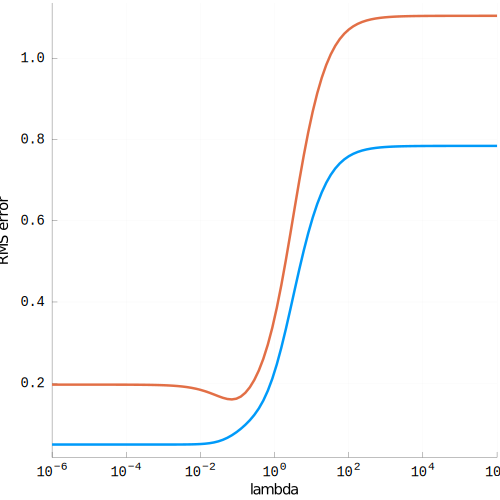

In [147]:
using Plots
# Plot RMS errors
plot(lambdas, err_train, xscale = :log10, label = "Train", linewidth = 10)
plot!(lambdas, err_test, xscale = :log10, label = "Test", linewidth = 10)
plot!(xlabel = "lambda", ylabel = "RMS error", xlim = (1e-6, 1e6), markersize = 10, legend=false, 

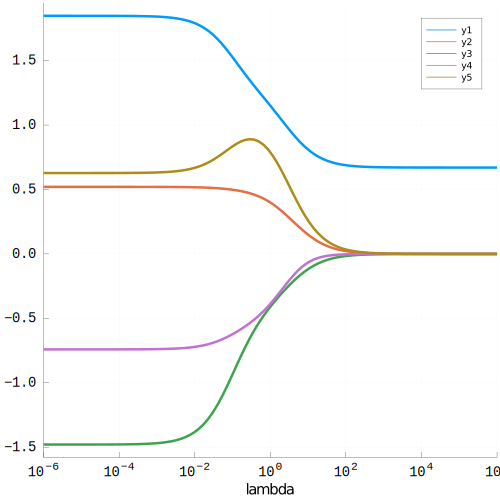

In [149]:
# Plot coefficients
plot(lambdas, thetas', xscale = :log10,  linewidth = 10)
plot!(xlabel = "lambda", xlim = (1e-6, 1e6), size = (2000, 2000),  xtickfont = font(30, "Courier"),ytickfont = font(30, "Courier"), legendfont=font(25), guidefontsize = font(40))

# Chapter 16

## 16.1 Constrained least squares problem

Piecewise polynomial. We fit a function ˆf : R → R to some given data, where
ˆf(x) = p(x) for x ≤ a and ˆf(x) = q(x) for x > a, subject to p(a) = q(a) and
p
0
(a) = q
0
(a), i.e., the two polynomials have matching value and slope at the
knot point a. We have data points x1, . . . , xM ≤ a and xM+1, . . . , xN > a and
corresponding values y1, . . . , yN . In the example we take a = 0, polynomials p and
q of degree 3, and N = 2M = 140. The code creates a figure similar to Figure 16.1
of VMLS (Figure 16.1). We use the vandermonde function from page 60.


(process:12764): GLib-GIO-WARNING **: 17:50:29.578: Unexpectedly, UWP app `Evernote.Evernote_10.28.3.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


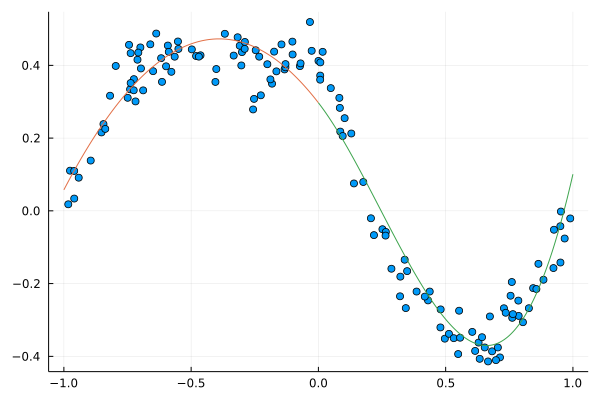

In [1]:
using LinearAlgebra
using Plots
using VMLS

M = 70; N = 2*M;
xleft = rand(M) .- 1; xright = rand(M);
x = [xleft; xright]
y = x.^3 - x + 0.4 ./ (1 .+ 25*x.^2) + 0.05*randn(N);
n = 4;
A = [ vandermonde(xleft,n) zeros(M,n); # for p(x)
zeros(M,n) vandermonde(xright,n)] # for q(x)

b = y;
C = [1 zeros(1,n-1) -1 zeros(1,n-1);
0 1 zeros(1,n-2) 0 -1 zeros(1,n-2)];

d = zeros(2);
theta = cls_solve(A, b, C, d);




# Evaluate and plot for 200 equidistant points on each side.
Npl = 200;
xpl_left = linspace(-1, 0, Npl);
ypl_left = vandermonde(xpl_left, 4)*theta[1:n];
# wrong : vandermonde(xpl_left, 8)*theta[1:end];

xpl_right = linspace(0, 1, Npl);
ypl_right = vandermonde(xpl_right, 4)*theta[n+1:end];
# wrong : vandermonde(xpl_left, 8)*theta[1:end];
scatter(x,y, legend=false)
plot!(xpl_left, ypl_left)
plot!(xpl_right, ypl_right)

In [52]:
# (1 .+ 25*x.^2)
# (1 .+ 25*[1, 2].^2)

In [53]:
# A

In [54]:
# C
# zeros(1,n-1)

In [55]:
# theta

## 16.2 Solution

Let’s implement the function cls_solve_kkt, which finds the constrained least
squares solution by forming the KKT system and solving it. We allow the b and
d to be matrices, so one function call can solve mutiple problems with the same A
and C.

In [2]:
function cls_solve_kkt(A,b,C,d)
    m, n = size(A)
    p, n = size(C)
    G = A'*A # Gram matrix
    KKT = [2*G C'; C zeros(p,p)] # KKT matrix
    xzhat = KKT \ [2*A'*b; d]
    return xzhat[1:n,:]
end;

In [3]:
A = randn(10,5); b = randn(10);
C = randn(2,5); d = randn(2);
x = cls_solve_kkt(A,b,C,d);
C*x - d # Check residual small

2×1 Matrix{Float64}:
 -1.1102230246251565e-16
  1.1102230246251565e-16

## 16.3 Solving contrained least squares problems

Solving constrained least squares via QR. Let’s implement VMLS algorithm 16.1
and then check it against our method above, which forms and solves the KKT
system.

In [4]:
# function cls_solve(A,b,C,d)
#     m, n = size(A)
#     p, n = size(C)
#     Q, R = qr([A; C])
#     Q = Matrix(Q)
#     Q1 = Q[1:m,:]
#     Q2 = Q[m+1:m+p,:]
#     Qtil, Rtil = qr(Q2')
#     Qtil = Matrix(Qtil)
#     w = Rtil \ (2*Qtil'*Q1'*b - 2*(Rtil'\d))
#     return xhat = R \ (Q1'*b - Q2'*w/2)
# end
# check with KKT method

m = 10; n = 5; p = 2;
A = randn(m,n); b = randn(m); C = randn(p,n); d = randn(p);
xKKT = cls_solve_kkt(A,b,C,d);
xQR = cls_solve(A,b,C,d);
norm(xKKT-xQR)

3.885780586188048e-16

In [5]:
println([[2, 4, 6] .== 6])
print([2, 4, 6][[2, 4, 6] .== 6])

BitVector[[0, 0, 1]]
[6]

# Chapter 17

## 17.1 Portfolio optimization

Compounded portfolio value. The cumulative value of a portfolio from a return
time series vector r, starting from the traditional value of $10000, is given by the
value time series vector v, where

vt = 10000(1 + r1)· · ·(1 + rt−1), t = 1, . . . , T.

In other words, we form the cumulative product of the vector with entries 1 + rt.
Julia has a built-in function that does this, cumprod.

In [6]:
# Portfolio value with re-investment, return time series r
cum_value(r) = 10000 * cumprod(1 .+ r)

# Generate random returns sequence with
# 10% annualized return, 5% annualized risk
mu = 0.10/250; sigma = 0.05/sqrt(250);
T = 250; # One year's worth of trading days
r = mu .+ sigma*randn(T);
v = cum_value(r);

# compare final value (compounded) and average return
v[T] , v[1]*(1+sum(r))

(10867.971150937272, 10799.03090831336)

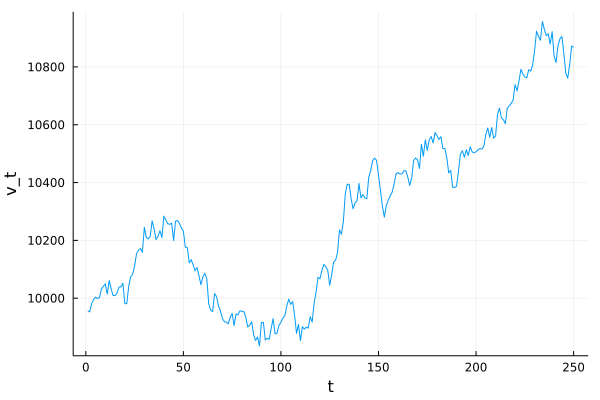

In [7]:
# plot cumulative value over the year
using Plots
plot(1:T, v, legend=false)
plot!( xlabel = "t", ylabel = "v_t")

Portfolio optimization. We define a function port_opt that evaluates the solu-
tion (17.3) of the constrained least squares problem (17.2) in VMLS, and apply to
the return data in VMLS Section 17.1.3.

In [8]:
function port_opt(R,rho)
    T, n = size(R)
    mu = sum(R, dims=1)'/T
    KKT = [ 2*R'*R ones(n) mu; ones(n)' 0 0; mu' 0 0] # 20x20 20x1 20x1 ; 1x20 1x1 1x1 ; 1x20 1x1 1x1
    wz1z2 = KKT \ [2*rho*T*mu; 1; rho]
    w = wz1z2[1:n]
    return w
end;

R, Rtest = portfolio_data();
T, n = size(R) # T=2000, n=20

rho = 0.10/250; # Ask for 10% annual return
w = port_opt(R,rho);
r = R*w; # Portfolio return time series
pf_return = 250*avg(r)

pf_risk = sqrt(250)*stdev(r)

# R

0.0865018308685463

In [57]:
# sum([1 2; 3 4], dims=1)

In [58]:
# Rtest

In [59]:
# r

In [60]:
# cum_value(r)

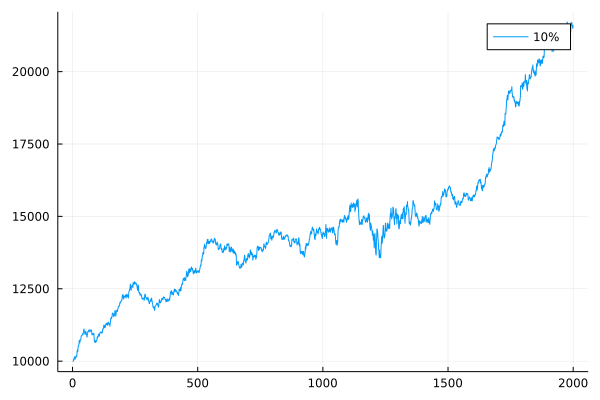

In [9]:
using Plots
plot(1:T, cum_value(r), label= "10%")

## 17.2 Linear quadratic control

Kronecker product. To create the big matrices A ̃ and C ̃, we need to define block
diagonal matrices with the same matrix repeated a number of times along the
diagonal. There are many ways to do this in Julia. One of the simplest ways
uses the kron function, for the Kronecker product of two matrices. The Kronecker
product of an m × n matrix G and a p × q matrix H is defined as the mp × nq
block matrix

G11H G12H · · · G1nH
G21H G22H · · · G2nH
.
.
.
.
.
.

.
.
.
Gm1H Gm2H · · · GmnH

It is computed in Julia as kron(G,H). If G is an n × n identity matrix, we obtain
the block diagonal matrix with H repeated n times on the diagonal.

In [73]:
H = randn(2,2)

2×2 Matrix{Float64}:
 1.40846  -0.769343
 1.41534  -0.605757

In [75]:
kron(eye(3),H) # 6x6 把H看成I

6×6 Matrix{Float64}:
 1.40846  -0.769343  0.0      -0.0       0.0      -0.0
 1.41534  -0.605757  0.0      -0.0       0.0      -0.0
 0.0      -0.0       1.40846  -0.769343  0.0      -0.0
 0.0      -0.0       1.41534  -0.605757  0.0      -0.0
 0.0      -0.0       0.0      -0.0       1.40846  -0.769343
 0.0      -0.0       0.0      -0.0       1.41534  -0.605757

In [76]:
cat([H for k=1:3]..., dims=(1,2))

6×6 Matrix{Float64}:
 1.40846  -0.769343  0.0       0.0       0.0       0.0
 1.41534  -0.605757  0.0       0.0       0.0       0.0
 0.0       0.0       1.40846  -0.769343  0.0       0.0
 0.0       0.0       1.41534  -0.605757  0.0       0.0
 0.0       0.0       0.0       0.0       1.40846  -0.769343
 0.0       0.0       0.0       0.0       1.41534  -0.605757

Linear quadratic control example. We start by writing a function lqr that con-
structs and solves the constrained least squares problem for linear quadratic control.
The function returns three arrays

The first two contain the optimal solution of the problem. The third array contains
yt = Cxt.
We allow the input arguments x_init and x_des to be matrices, so we can solve
the same problem for different pairs of initial and end states, with one function call.
If the number of columns in x_init and x_des is q, then the entries of the three
output sequences x, u, y are matrices with q columns. The ith columns are the
solution for the initial and end states specified in the ith columns of x_init and
x_des.

In [77]:
function lqr(A,B,C,x_init,x_des,T,rho)
    n = size(A,1)
    m = size(B,2)
    p = size(C,1)
    q = size(x_init,2)
    Atil = [ kron(eye(T), C) zeros(p*T,m*(T-1)) ;
        zeros(m*(T-1), n*T) sqrt(rho)*eye(m*(T-1)) ]
    btil = zeros(p*T + m*(T-1), q)
    # We'll construct Ctilde bit by bit
    Ctil11 = [ kron(eye(T-1), A) zeros(n*(T-1),n) ] -
        [ zeros(n*(T-1), n) eye(n*(T-1)) ]
    Ctil12 = kron(eye(T-1), B)
    Ctil21 = [eye(n) zeros(n,n*(T-1)); zeros(n,n*(T-1)) eye(n)]
    Ctil22 = zeros(2*n,m*(T-1))
    Ctil = [Ctil11 Ctil12; Ctil21 Ctil22]
    dtil = [zeros(n*(T-1), q); x_init; x_des]
    z = cls_solve(Atil,btil,Ctil,dtil)
    x = [z[(i-1)*n+1:i*n,:] for i=1:T]
    u = [z[n*T+(i-1)*m+1 : n*T+i*m, :] for i=1:T-1]
    y = [C*xt for xt in x]
    return x, u, y
end;

In [78]:
A = [ 0.855 1.161 0.667;
0.015 1.073 0.053;
-0.084 0.059 1.022 ];
B = [-0.076; -0.139; 0.342 ];
C = [ 0.218 -3.597 -1.683 ];
n = 3; p = 1; m = 1;
x_init = [0.496; -0.745; 1.394];
x_des = zeros(n,1);

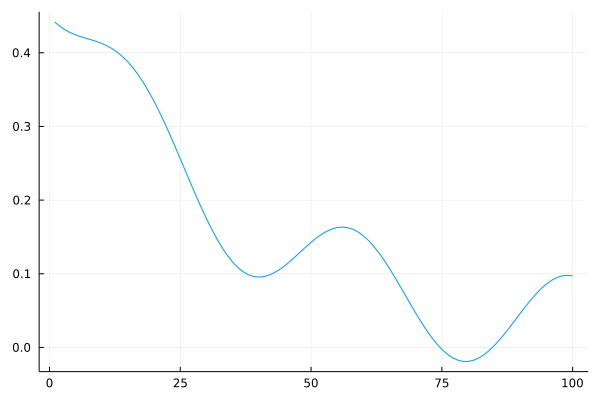

In [79]:
T = 100;
yol = zeros(T,1);
Xol = [ x_init zeros(n, T-1) ];
for k=1:T-1
    Xol[:,k+1] = A*Xol[:,k];
end;
yol = C*Xol;
using Plots
plot(1:T, yol', legend = false)

In [80]:
rho = 0.2;
T = 100;
x, u, y = lqr(A,B,C,x_init,x_des,T,rho)
J_input = norm(u)^2

J_output = norm(y)^2

3.7829986463324268

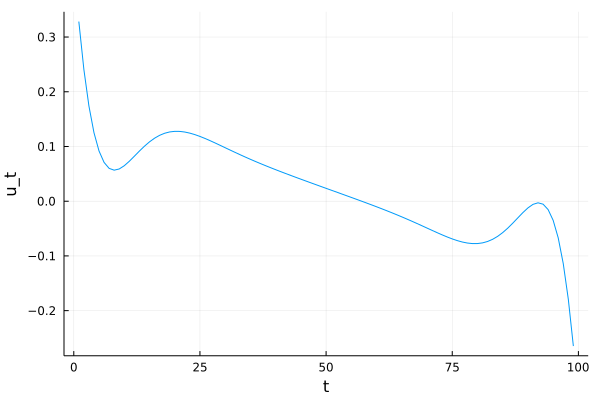

In [81]:
plot(1:T-1, vcat(u...), legend = false, xlabel="t", ylabel= "u_t")


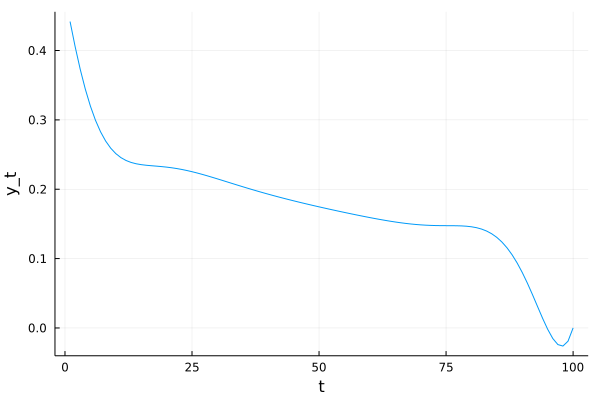

In [82]:
plot(1:T, vcat(y...), legend=false, xlabel = "t", ylabel = "y_t")

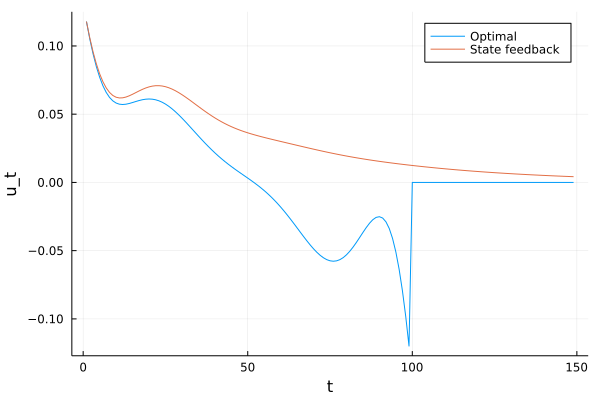

In [83]:
# Solve LQ problem with x_init = I, x_des = 0
rho = 1.0;
xsf, usf, ysf = lqr(A,B,C,eye(n),zeros(n,n),T,rho);
K = usf[1];
# Simulate over horizon 150
TT = 150;
Xsf = [x_init zeros(n,TT-1)];
for k=1:TT-1
    Xsf[:,k+1] = (A+B*K)*Xsf[:,k];
end;

usf = K*Xsf[:, 1:TT-1];
ysf = C*Xsf;
# Also compute optimal LQ solution for rho = 1.0
x, u, y = lqr(A,B,C,x_init,x_des,T,rho)
# Plot the two inputs
plot([vcat(u...); zeros(TT-T,1)], label="Optimal", xlabel = "t", ylabel = "u_t")
plot!(usf', label = "State feedback")

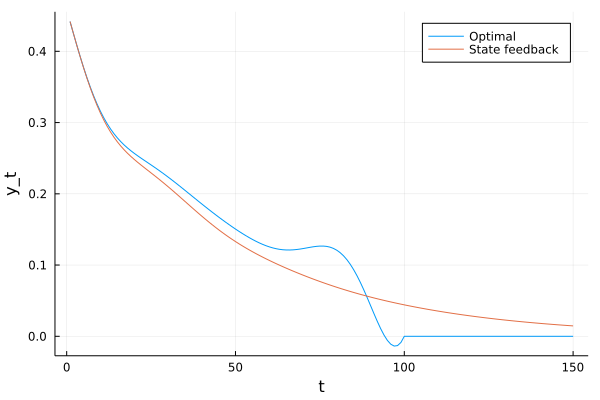

In [84]:
 # Plot the two outputs
plot_sf_y = plot([vcat(y...); zeros(TT-T,1)], label="Optimal", xlabel = "t", ylabel = "y_t")
plot!(ysf', label = "State feedback")

## 17.3 Linear quadratic state estimation

In [85]:
function lqe(A,B,C,y,T,lambda)
    n = size(A,1)
    m = size(B,2)
    p = size(C,1)
    Atil = [ kron(eye(T), C) zeros(T*p, m*(T-1));
    zeros(m*(T-1), n*T) sqrt(lambda)*eye(m*(T-1)) ]
    # We assume y is a p x T array, so we vectorize it
    btil = [ vcat(y...) ; zeros((T-1)*m) ]
    Ctil = [ ([ kron(eye(T-1), A) zeros(n*(T-1), n) ] +
    [ zeros(n*(T-1), n) -eye(n*(T-1)) ]) kron(eye(T-1), B) ]
    dtil = zeros(n*(T-1))
    z = cls_solve(Atil, btil, Ctil, dtil)
    x = [ z[(i-1)*n+1:i*n] for i=1:T ]
    u = [ z[n*T+(i-1)*m+1 : n*T+i*m] for i=1:T-1 ]
    y = [ C*xt for xt in x ]
    return x, u, y
end

lqe (generic function with 1 method)

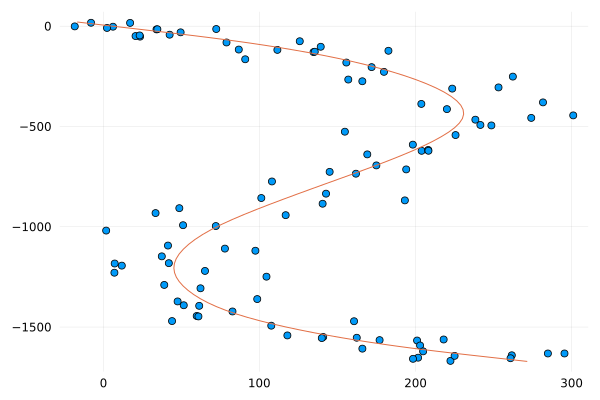

In [86]:
ymeas = lq_estimation_data();
A = [ eye(2) eye(2); zeros(2,2) eye(2) ];
B = [ zeros(2,2); eye(2) ];
C = [ eye(2) zeros(2,2) ];
T = 100;
lambda = 1e3;
xest, uest, yest = lqe(A,B,C,ymeas,T,lambda)
using Plots
scatter(ymeas[1,:], ymeas[2,:], legend = false, axis = false)
plot!( [yt[1] for yt in yest], [yt[2] for yt in yest])

# Chapter18

In [1]:
using VMLS
using LinearAlgebra
using Plots
# using Pkg
# Pkg.add("Images")
using Images


(process:5404): GLib-GIO-WARNING **: 13:48:26.318: Unexpectedly, UWP app `Evernote.Evernote_10.28.3.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


In [88]:
# display("image/png", read("ch18_newton.png"))

In [2]:
function gauss_newton(f, Df, x1; kmax = 10)
    x = x1
    for k = 1:kmax
        x = x - Df(x) \ f(x)
    end
    return x
end

gauss_newton (generic function with 1 method)

In [3]:
function newton(f, Df, x1; kmax = 20, tol = 1e-6)
    x = x1
    fnorms = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        fnorms = [fnorms; norm(fk)]
        if norm(fk) < tol
            break
        end;
        x = x - Df(x) \ fk
    end
    return x, fnorms
end

newton (generic function with 1 method)

In [4]:
zeros(0,1)

0×1 Matrix{Float64}

Example

In [5]:
f(x) = (exp(x)-exp(-x)) / (exp(x)+exp(-x));
Df(x) = 4 / (exp(x) + exp(-x))^2;

In [6]:
x, fnorms = newton(f,Df,0.95);
f(x)

fnorms

5×1 Matrix{Float64}:
 0.7397830512740042
 0.5941663642651943
 0.230111245500342
 0.00867002864500564
 4.3451974318649333e-7

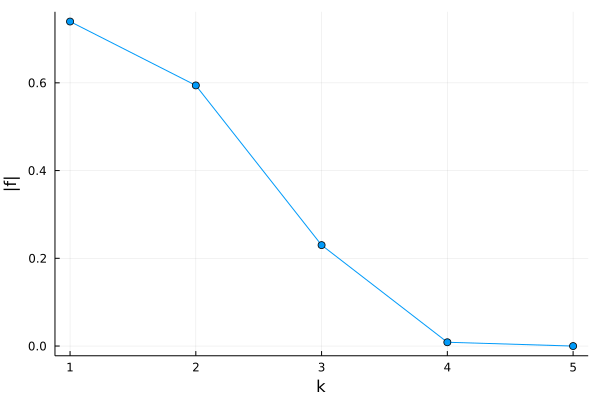

In [7]:
using Plots
plot(fnorms, shape=:circle, legend = false, xlabel = "k", ylabel = "|f|")

In [8]:
x, fnorms = newton(f,Df,1.15);
f(x)

NaN

In [9]:
fnorms[1:5]

5-element Vector{Float64}:
   0.8177540779702877
   0.8664056534177533
   0.9735568532451107
   0.9999999999999906
 NaN

## 18.3 Levenberg–Marquardt algorithm

The Gauss–Newton algorithm can fail if the derivative matrix does not have in-
dependent columns. It also does not guarantee that kf(x

(k)
)k decreases in each
iteration. Both of these shortcomings are addressed in the Levenberg–Marquardt

algorithm. Below is a Julia implementation of algorithm 18.3 in VMLS. This func-
tion is included in the Vmls package.

In [35]:
function levenberg_marquardt(f, Df, x1, lambda1; kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        objectives = [objectives; norm(fk)^2]
        residuals = [residuals; norm(2*Dfk'*fk)]
        if norm(2*Dfk'*fk) < tol
            break
        end;
        xt = x - [ Dfk; sqrt(lambda)*eye(n) ] \ [ fk; zeros(n) ]
        if norm(f(xt)) < norm(fk)
            lambda = 0.8*lambda
            x = xt
        else
            lambda = 2.0*lambda
        end
    end
    return x, Dict([ ("objectives", objectives), ("residuals", residuals)])
end

levenberg_marquardt (generic function with 1 method)

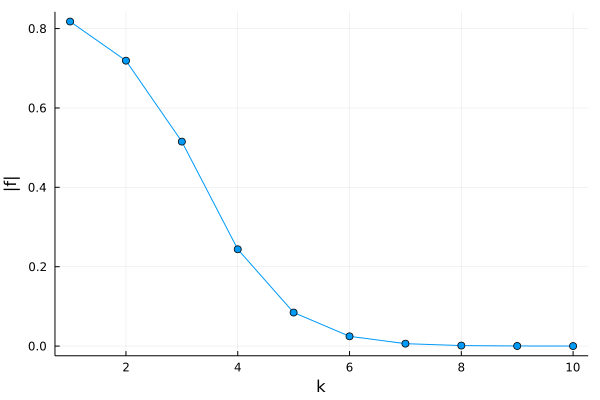

In [36]:
f(x) = (exp.(x) - exp.(-x)) / (exp.(x) + exp.(-x));
Df(x) = 4 ./ (exp.(x) + exp.(-x)).^2;
x, history = levenberg_marquardt(f, Df, [1.15], 1.0);
plot(sqrt.(history["objectives"][1:10]), shape = :circle, legend = false, xlabel = "k", ylabel = "|f|")

In [37]:
snom = [2.2, 0.3];
dnom = [3.1, 2.2];
Es = [0.5 -.3; -0.15 0.8];
Ed = [-0.5 0.2; -0.00 -0.5];
f(p) = exp.(Es * log.(p) + snom) - exp.(Ed * log.(p) + dnom);
function Df(p)
    S = exp.(Es * log.(p) + snom);
    D = exp.(Ed * log.(p) + dnom);
    return [ S[1]*Es[1,1]/p[1] S[1]*Es[1,2]/p[2];
        S[2]*Es[2,1]/p[1] S[2]*Es[2,2]/p[2] ] -
        [ D[1]*Ed[1,1]/p[1] D[1]*Ed[1,2]/p[2];
        D[2]*Ed[2,1]/p[1] D[2]*Ed[2,2]/p[2] ];
end;

p, history = levenberg_marquardt(f, Df, [3, 9], 1);
p

2-element Vector{Float64}:
 5.644108533416073
 5.265754930531486

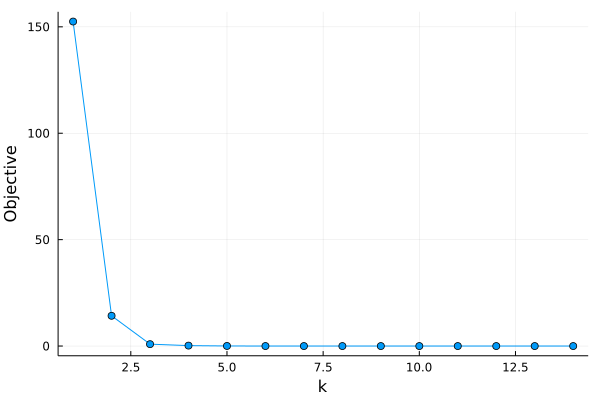

In [38]:
using Plots
plot(history["objectives"], shape = :circle, legend =false, xlabel = "k", ylabel = "Objective")

## 18.4 Nonlinear model fitting

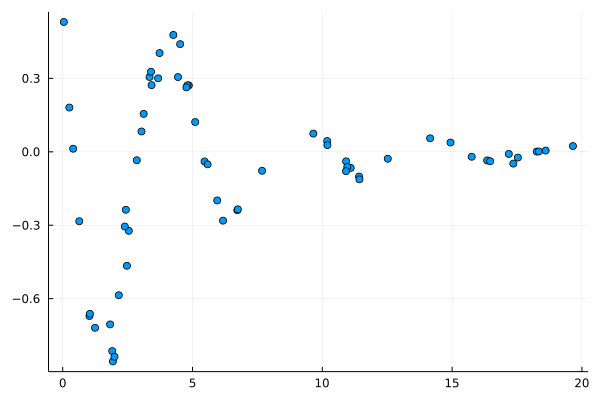

In [15]:
# Use these parameters to generate data.
theta_ex = [1, -0.2, 2*pi/5, pi/3];
# Choose 60 points x between 0 and 20.
M = 30;
xd = [5*rand(M); 5 .+ 15*rand(M)];
# Evaluate function at these points.
yd = theta_ex[1] * exp.(theta_ex[2]*xd) .* cos.(theta_ex[3] * xd .+ theta_ex[4])
# Create a random perturbation of yd.
N = length(xd);
yd = yd .* (1 .+ 0.2*randn(N)) .+ 0.015 * randn(N);
# Plot data points.
using Plots
scatter(xd, yd, legend=false)

In [22]:
[5*rand(M); 5 .+ 15*rand(M)];

In [16]:
f(theta) = theta[1] * exp.(theta[2]*xd) .* cos.(theta[3] * xd .+ theta[4]) - yd;

Df(theta) = hcat(
exp.(theta[2]*xd) .* cos.(theta[3] * xd .+ theta[4]),
theta[1] * ( xd .* exp.(theta[2]*xd) .*
cos.(theta[3] * xd .+ theta[4])),
-theta[1] * ( exp.(theta[2]*xd) .* xd .*
sin.(theta[3] * xd .+ theta[4])),
-theta[1] * ( exp.(theta[2]*xd) .*
sin.(theta[3] * xd .+ theta[4]))
);

theta1 = [1, 0, 1, 0];
theta, history = levenberg_marquardt(f, Df, theta1, 1.0)
theta

4-element Vector{Float64}:
  1.2107160580960148
 -0.2344108990473148
  1.2542631437160705
  1.0531742621697264

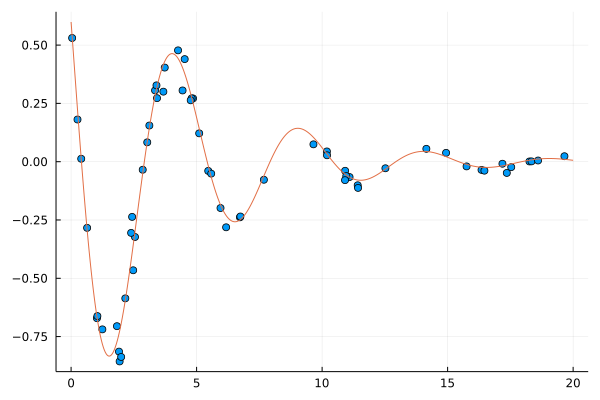

In [17]:
# Plot the fitted model.
x = linspace(0, 20, 500);
y=theta[1]*exp.(theta[2]*x) .* cos.(theta[3]*x .+ theta[4]);
plot!(x, y, legend = false)

# Chapter19

## 19.2 Penalty algorithm

In [25]:
function penalty_method(f, Df, g, Dg, x1, lambda1; kmax = 100,
    feas_tol = 1e-4, oc_tol = 1e-4)
    x = x1
    mu = 1.0
    feas_res = [norm(g(x))]
    oc_res = [norm(2*Df(x)'*f(x) + 2*mu*Dg(x)'*g(x))]
    lm_iters = zeros(Int64,0,1);
    for k=1:kmax
        F(x) = [f(x); sqrt(mu)*g(x)]
        DF(x) = [Df(x); sqrt(mu)*Dg(x)]
        x, hist = levenberg_marquardt(F,DF,x,lambda1,tol=oc_tol)
        feas_res = [feas_res; norm(g(x))]
        oc_res = [oc_res; hist["residuals"][end]]
        lm_iters = [lm_iters; length(hist["residuals"])]
        if norm(g(x)) < feas_tol
            break
        end
        mu = 2*mu
    end
    return x, Dict([ ("lm_iterations", lm_iters), ("feas_res", feas_res), ("oc_res", oc_res) ])
end
            

penalty_method (generic function with 1 method)

In [26]:
f(x) = [ x[1] + exp(-x[2]), x[1]^2 + 2*x[2] + 1 ];
Df(x) = [ 1.0 -exp(-x[2]); 2*x[1] 2 ];
g(x) = [ x[1] + x[1]^3 + x[2] + x[2]^2 ];
Dg(x) = [ 1 + 3*x[1]^2 1 + 2*x[2] ];
x, hist = penalty_method(f, Df, g, Dg, [0.5, -0.5], 1.0);
x

2-element Vector{Float64}:
 -3.3349551411345114e-5
 -2.7682497161012516e-5

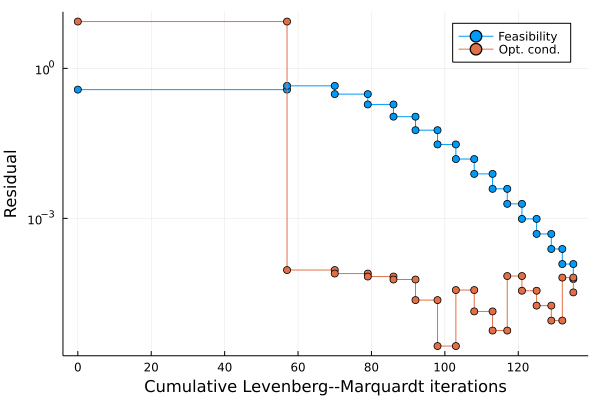

In [27]:
using Plots
cum_lm_iters = cumsum(hist["lm_iterations"], dims=1);
itr = vcat([0], [[i; i] for i in cum_lm_iters]...)
feas_res = vcat([
    [r;r] for r in hist["feas_res"][1:end-1]]...,
    hist["feas_res"][end]);

oc_res = vcat([
    [r;r] for r in hist["oc_res"][1:end-1]]...,
    hist["oc_res"][end]);

plot(itr, feas_res, shape=:circle, label = "Feasibility")
plot!(itr, oc_res, shape=:circle, label = "Opt. cond.")
plot!(yscale = :log10,
xlabel = "Cumulative Levenberg--Marquardt iterations",
ylabel = "Residual")

## 19.3 Augmented Lagrangian algorithm

In [30]:
function aug_lag_method(f, Df, g, Dg, x1, lambda1; kmax = 100,
    feas_tol = 1e-4, oc_tol = 1e-4)
    x = x1
    z = zeros(length(g(x)))
    mu = 1.0
    feas_res = [norm(g(x))]
    oc_res = [norm(2*Df(x)'*f(x) + 2*mu*Dg(x)'*z)]
    lm_iters = zeros(Int64,0,1);
    for k=1:kmax
        F(x) = [f(x); sqrt(mu)*(g(x) + z/(2*mu))]
        DF(x) = [Df(x); sqrt(mu)*Dg(x)]
        x, hist = levenberg_marquardt(F, DF, x, lambda1, tol=oc_tol)
        z = z + 2*mu*g(x)
        feas_res = [feas_res; norm(g(x))]
        oc_res = [oc_res; hist["residuals"][end]]
        lm_iters = [lm_iters; length(hist["residuals"])]
        if norm(g(x)) < feas_tol
            break
        end
        mu = (norm(g(x)) < 0.25*feas_res[end-1]) ? mu : 2*mu
    end
    return x, z, Dict([ ("lm_iterations", lm_iters), ("feas_res", feas_res), ("oc_res", oc_res)])
end

aug_lag_method (generic function with 1 method)

In [31]:
x, z, hist = aug_lag_method(f, Df, g, Dg, [0.5, -0.5], 1.0);
x

2-element Vector{Float64}:
 -1.864661485588675e-5
 -1.500856782026583e-5

In [32]:
z

1-element Vector{Float64}:
 -1.999958127349911

In [33]:
using Plots
cum_lm_iters = cumsum(hist["lm_iterations"],dims=1);
itr = vcat([0], [[i; i] for i in cum_lm_iters]...)
feas_res = vcat([
[r;r] for r in hist["feas_res"][1:end-1]]...,
hist["feas_res"][end]);

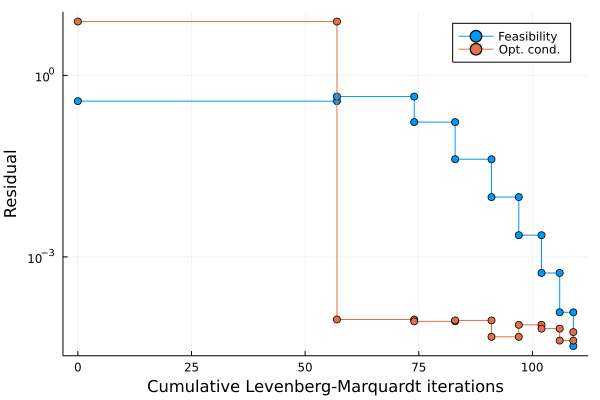

In [34]:
oc_res = vcat([
[r;r] for r in hist["oc_res"][1:end-1]]...,
hist["oc_res"][end]);

plot(itr, feas_res, shape=:circle, label = "Feasibility")
plot!(itr, oc_res, shape=:circle, label = "Opt. cond.")
plot!(yscale = :log10,
xlabel = "Cumulative Levenberg-Marquardt iterations",
ylabel = "Residual")